In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/cars_and_carplates_sol.csv', sep=';')
df2 = pd.read_csv('/content/human_and_head_sol.csv', sep=';')
df3 = pd.read_csv('/content/faces_only_solution.csv', sep=';')

In [ ]:
cmb = pd.concat([df1, df2, df3], ignore_index=True)

In [ ]:
cmb

,ImageID,LabelName,Conf,XMin,XMax,YMin,YMax
0,25-11-2021_06-44-40_AM.jpg,0,0.934134,3.968755e-01,0.830209,0.750000,0.999074
1,25-11-2021_06-44-40_AM.jpg,0,0.959038,4.166800e-03,0.150000,0.562037,0.726851
2,26-11-2021_12-08-44_PM.jpg,0,0.685049,-5.000000e-08,0.029687,0.277778,0.397222
3,26-11-2021_12-08-44_PM.jpg,0,0.796908,5.937505e-02,0.132813,0.197222,0.277778
4,26-11-2021_12-08-44_PM.jpg,0,0.867853,3.890627e-01,0.446875,0.127778,0.197222
...,...,...,...,...,...,...,...
12045,25-11-2021_07-03-10_AM.jpg,2,0.672014,8.348000e-01,0.838000,0.229187,0.238383
12046,26-11-2021_08-41-58_AM.jpg,2,0.684513,4.004000e-01,0.406800,0.904533,0.911467
12047,26-11-2021_11-44-35_AM.jpg,2,0.871270,1.052000e-01,0.110000,0.336000,0.345196
12048,24-11-2021_03-18-11_PM.jpg,2,0.699434,2.904000e-01,0.295200,0.421592,0.431495


In [ ]:
cmb.to_csv("cmb.csv", sep=';', index=False)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://lodmedia.hb.bizmrg.com/case_files/789899/test_dataset_test.zip

--2022-08-18 21:19:34--  https://lodmedia.hb.bizmrg.com/case_files/789899/test_dataset_test.zip
Resolving lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)... 217.69.142.100
Connecting to lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)|217.69.142.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 455731722 (435M) [application/zip]
Saving to: ‘test_dataset_test.zip’

test_dataset_test.z 100%[===================>] 434.62M  22.5MB/s    in 20s     

2022-08-18 21:19:55 (21.4 MB/s) - ‘test_dataset_test.zip’ saved [455731722/455731722]



In [ ]:
!unzip test_dataset_test.zip

(1520, 2688, 3)
[['0' '0.502715' '0.078497' '0.140253' '0.2019734' '0.2447366']
 ['0' '0.650682' '0.1622022' '0.2187498' '0.1223684499999999'
  '0.17828955']
 ['0' '0.651628' '0.0840771' '0.1428569' '0.2269734' '0.2822366']
 ['0' '0.694628' '0.07291665' '0.11272315' '0.16907895' '0.20592105']
 ['0' '0.71787' '0.08854205' '0.14918195' '0.24605225' '0.31184175']
 ['0' '0.757587' '0.1975445' '0.2436755' '0.16776315' '0.20723685']
 ['0' '0.770498' '0.1305801499999999' '0.15736585' '0.1585531'
  '0.1973689']
 ['0' '0.824802' '0.2351192' '0.2912948' '0.1842108499999999'
  '0.23223715']
 ['0' '0.837267' '0.2172614' '0.2667406' '0.17500045' '0.21842155']
 ['0' '0.869387' '0.25409175' '0.32366025' '0.1921053999999999'
  '0.2473686']
 ['0' '0.896142' '0.0970980499999999' '0.18935995' '0.2578946'
  '0.3401314']
 ['0' '0.912984' '0.2879464' '0.3686756' '0.2157891499999999'
  '0.28026285']
 ['0' '0.919625' '0.4274555' '0.5305065' '0.3026319' '0.4013161']
 ['0' '0.923656' '0.38690505' '0.47953895' '

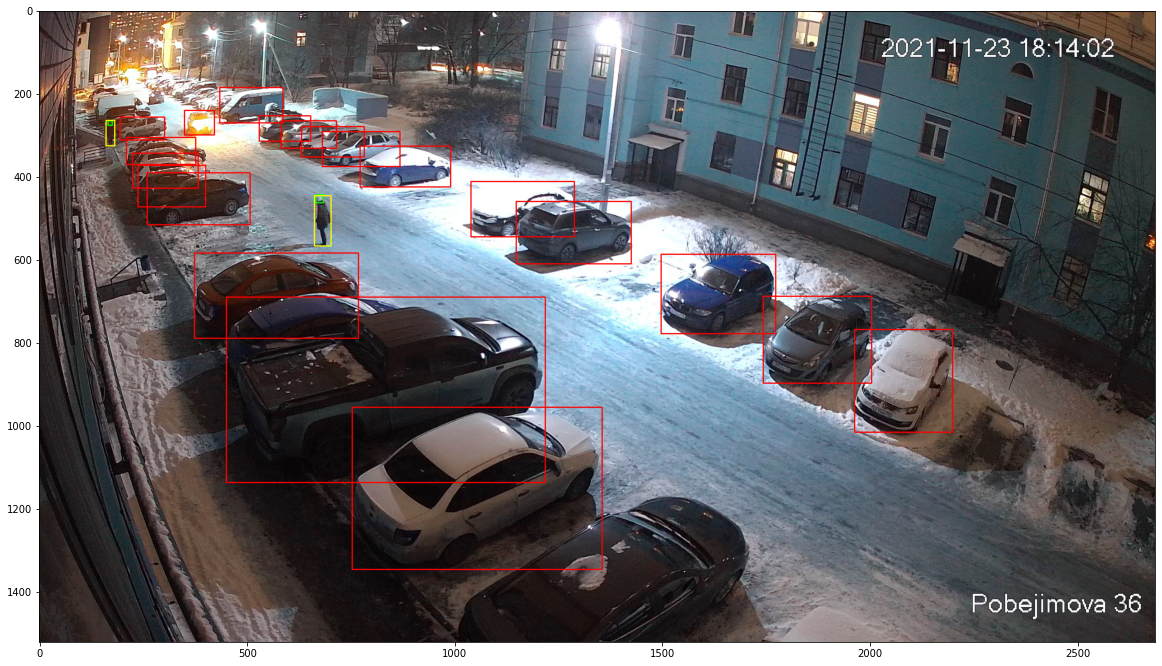

In [ ]:
img_name = '23-11-2021_03-14-04_PM.jpg'
img = cv2.imread(f'/content/test/images/{img_name}')
ndf = pd.read_csv('cmb.csv', sep=';', names=['class', 'conf', 'x', 'y', 'w', 'h'])
data = ndf.loc[img_name].to_numpy()
print(img.shape)
if list(ndf.index).count(img_name) == 1:
  data = np.expand_dims(data, axis=0)
print(data)

dh, dw, _ = img.shape

colors = {0: (255, 0, 0),
          1: (0, 255, 0),
          2: (0, 0, 255),
          3: (255, 255, 0),
          4: (0, 255, 255)}

for p in range(len(data)):
    cls = int(data[p][0])
    x, y, w, h = float(data[p][2]), float(data[p][3]), float(data[p][4]), float(data[p][5])

    l = int(x * dw)
    r = int(y * dw)
    t = int(w * dh)
    b = int(h * dh)

    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1


    cv2.rectangle(img, (l, t), (r, b), colors[cls], 2)

plt.figure(figsize=(20, 30))
plt.imshow(img)